<a href="https://colab.research.google.com/github/ArmstrongVo/VoTrongLuan.github.io/blob/main/TRAININGfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import keras
import cv2
import tensorflow as tf
from keras.models import Sequential
from glob import glob
from keras.layers import Dense, Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, Conv3D, BatchNormalization
from keras.layers import LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img,img_to_array
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import array_to_img
import numpy as np


In [ ]:
# access to data
test='/content/drive/MyDrive/DATA FOR AI/PNEUMONIA/TEST'
train='/content/drive/MyDrive/DATA FOR AI/PNEUMONIA/TRAIN'



In [ ]:
# để hệ thống đạt được độ chính xác cao nhất
# tiến hành pre-processing sử dụng kỹ thuật data agumentation
# thiết lập các thông số cho data augmentation
# xoay ảnh
# lật chiều ngang
# lật dọc
# phóng to hoặc thu nhỏ

train_augen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=0.2, 
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   zoom_range=0.2)

test_augen = ImageDataGenerator(rescale=1./255)

train_set = train_augen.flow_from_directory(train,
                                            target_size=(150, 150),
                                            batch_size=128,
                                            class_mode='categorical')
                                               
test_set = test_augen.flow_from_directory(test,
                                          target_size=(150, 150),
                                          batch_size=128,
                                          class_mode='categorical')

Found 5478 images belonging to 3 classes.
Found 370 images belonging to 3 classes.


In [ ]:
# cấu trúc CNN
model = Sequential()
model.add(Conv2D(16, kernel_size=(3,3), activation='relu',kernel_initializer='he_uniform', padding='same',  input_shape=(150, 150,3)))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, kernel_size=(3,3),kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3),kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, kernel_size=(3,3),kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Activation("relu"))
model.add(Dense(1024))
model.add(Dropout(0.4))
model.add(Dense(3))
model.add(Activation("softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 150, 150, 16)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 75, 75, 32)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                  

In [ ]:
# compile mô hình
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

training_model = model.fit(train_set,
                    steps_per_epoch=120,
                    epochs=100,
                    validation_data=test_set,
                    validation_steps=11)
model.save("/content/drive/MyDrive/DATA FOR AI/PNEUMONIA/finalll.h5")

Epoch 1/100
170/170 [==============================] - 47s 263ms/step - loss: 0.7504 - accuracy: 0.6433 - val_loss: 0.9874 - val_accuracy: 0.5227
Epoch 2/100
170/170 [==============================] - 46s 272ms/step - loss: 0.7487 - accuracy: 0.6439 - val_loss: 1.1067 - val_accuracy: 0.4574
Epoch 3/100
170/170 [==============================] - 43s 251ms/step - loss: 0.7490 - accuracy: 0.6439 - val_loss: 1.1084 - val_accuracy: 0.5142
Epoch 4/100
170/170 [==============================] - 42s 248ms/step - loss: 0.7409 - accuracy: 0.6446 - val_loss: 1.1533 - val_accuracy: 0.4886
Epoch 5/100
170/170 [==============================] - 42s 247ms/step - loss: 0.7442 - accuracy: 0.6431 - val_loss: 1.0412 - val_accuracy: 0.5369
Epoch 6/100
170/170 [==============================] - 43s 254ms/step - loss: 0.7421 - accuracy: 0.6435 - val_loss: 0.9975 - val_accuracy: 0.5057
Epoch 7/100
170/170 [==============================] - 42s 247ms/step - loss: 0.7434 - accuracy: 0.6441 - val_loss: 0.9451 -

'                   \nhistory=model.fit(train_set,epochs=30,batch_size=128,verbose=1)    \n'

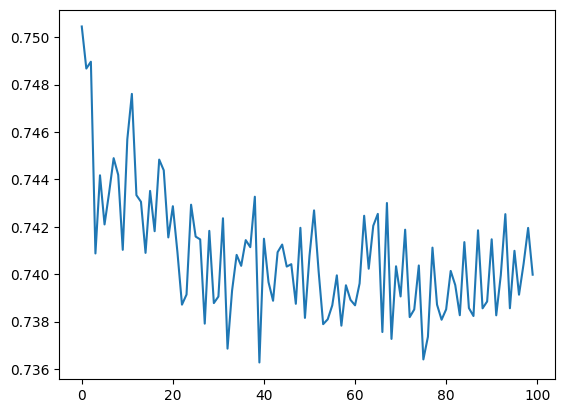

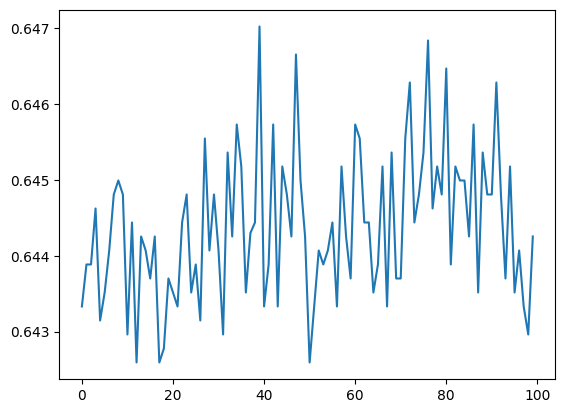

In [ ]:
plt.plot(training_model.history["loss"], label ="Train loss")
plt.show()
plt.plot(training_model.history["accuracy"], label ="Accuracy")
plt.show()

In [ ]:
dudoan = {0: 'COVID19',
          1: 'HEALTHY',
          2: 'PNEUMONIA'}

1/1 [==============================] - 0s 21ms/step
97.98305034637451 %


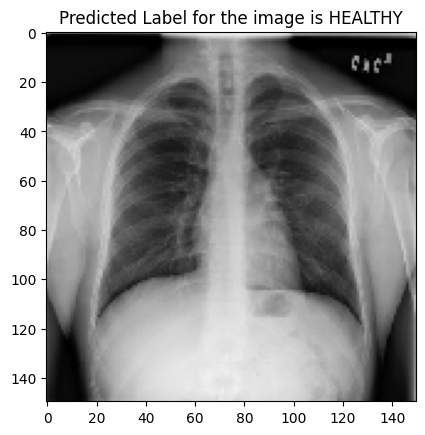

In [ ]:
img = load_img('/content/drive/MyDrive/DATA FOR AI/PNEUMONIA/TEST/HEALTHY/003d8fa0-6bf1-40ed-b54c-ac657f8495c5_jpg.rf.ec46024435074fe853a2d5ac4388863e.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)  
img = img.astype('float32')
img /= 255
prediction = model.predict(img).argmax()
plt.title("Predicted Label for the image is {}".format(dudoan[prediction]))
y_pred = model.predict(img)
a = y_pred.max()
a = a*100
print(a, '%')

1/1 [==============================] - 0s 17ms/step
99.793541431427 %


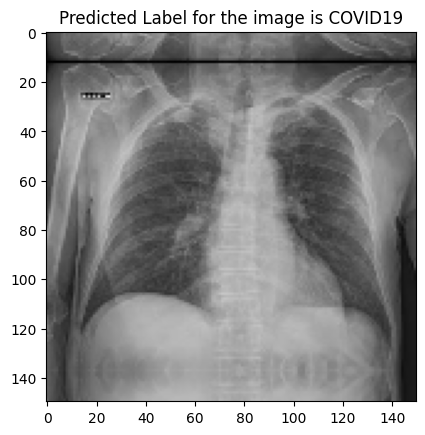

In [ ]:
img = load_img('/content/drive/MyDrive/DATA FOR AI/PNEUMONIA/TEST/COVID19/RX-torace-a-letto-del-paziente-in-unica-proiezione-AP-1-1_jpeg.rf.92fd561dfa745f546543382932594051.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)  
img = img.astype('float32')
img /= 255
prediction = model.predict(img).argmax()
plt.title("Predicted Label for the image is {}".format(dudoan[prediction]))
y_pred = model.predict(img)
a = y_pred.max()
a = a*100
print(a, '%')

1/1 [==============================] - 0s 17ms/step
53.20335030555725 %


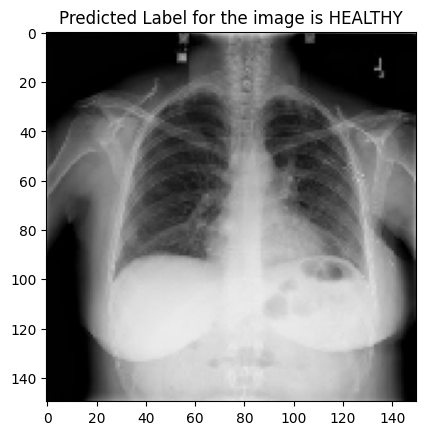

In [ ]:
img = load_img('/content/drive/MyDrive/DATA FOR AI/PNEUMONIA/TEST/PNEUMONIA/01b56434-4dd9-4994-bcc5-0b70a36e415a_jpg.rf.a074277e59b744873e66839f74c4e482.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)  
img = img.astype('float32')
img /= 255
prediction = model.predict(img).argmax()
plt.title("Predicted Label for the image is {}".format(dudoan[prediction]))
y_pred = model.predict(img)
a = y_pred.max()
a = a*100
print(a, '%')

1/1 [==============================] - 0s 188ms/step
98.85661005973816 %


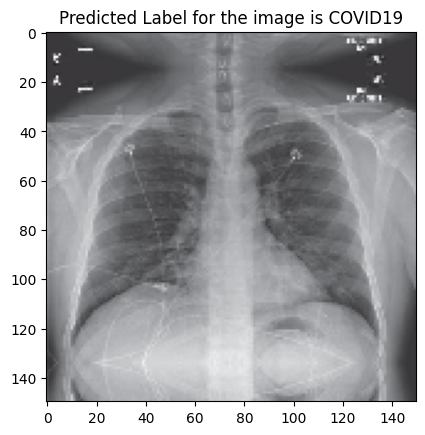

In [ ]:
img = load_img('/content/drive/MyDrive/DATA FOR AI/PNEUMONIA/TEST/COVID19/nejmoa2001191_f3-PA_jpeg.rf.3771c997f23742578b241149adc94201.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)  
img = img.astype('float32')
img /= 255
prediction = model.predict(img).argmax()
plt.title("Predicted Label for the image is {}".format(dudoan[prediction]))
y_pred = model.predict(img)
a = y_pred.max()
a = a*100
print(a, '%')

1/1 [==============================] - 0s 17ms/step
86.37009859085083 %


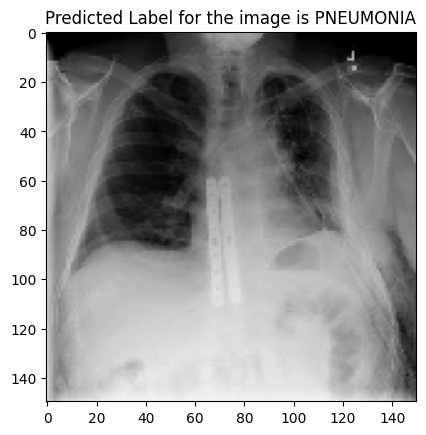

In [ ]:
img = load_img('/content/drive/MyDrive/DATA FOR AI/PNEUMONIA/TEST/PNEUMONIA/01d1f0be-5216-4af5-b2dc-a160c1c56122_jpg.rf.a4f0bc116619300d6efe4d6d3a3c0efd.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)  
img = img.astype('float32')
img /= 255
prediction = model.predict(img).argmax()
plt.title("Predicted Label for the image is {}".format(dudoan[prediction]))
y_pred = model.predict(img)
a = y_pred.max()
a = a*100
print(a, '%')